In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
import numpy as np

%matplotlib inline

In [3]:
import re

In [4]:
clean_data=gpd.read_file('../data/teis_final_data.csv')

In [5]:
clean_data.head(5)

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year,geometry
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,,,,,,Unable to contact,2010-01-25,DCS,2018,None
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,,,,,,Unable to contact,2016-08-31,PCP,2016,None
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,,1.0,NW,...,2016-07-12,Ineligible,8/25/2016,,,Ineligible for Part C,2016-08-25,Parent,2016,None
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,,,,,,Referral less than 45 days,2016-09-15,Parent,2016,None
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,,1.0,UC,...,2016-08-15,Eligible,10/5/2016,10/10/2016,,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016,None


In [6]:
age = clean_data[['Notification Date','DOB','POE','Child ID','County Name','County SES']]
age

,Notification Date,DOB,POE,Child ID,County Name,County SES
0,2018-01-20,2007-07-07,GN,104085,Davidson,Competitive
1,2016-08-17,2013-10-15,UC,350065,Jackson,At-Risk
2,2016-07-12,2013-11-13,NW,351755,Madison,Transitional
3,2016-09-14,2013-10-01,FT,353800,Hawkins,At-Risk
4,2016-08-05,2013-12-04,UC,353805,Putnam,Transitional
...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,GN,531592,Montgomery,Transitional
115520,2022-07-01,2021-12-07,GN,531593,Davidson,Competitive
115521,2022-07-01,2022-06-21,GN,531594,Montgomery,Transitional
115522,2022-07-01,2022-06-17,GN,531595,Davidson,Competitive


In [7]:
age.dtypes

Notification Date    object
DOB                  object
POE                  object
Child ID             object
County Name          object
County SES           object
dtype: object

In [8]:
age['Notification Date']=pd.to_datetime(age['Notification Date'])

C:\Users\vital\AppData\Local\Temp\ipykernel_3736\710523179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['Notification Date']=pd.to_datetime(age['Notification Date'])


In [9]:
age['DOB']=pd.to_datetime(age['DOB'])

C:\Users\vital\AppData\Local\Temp\ipykernel_3736\356649217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['DOB']=pd.to_datetime(age['DOB'])


In [10]:
age['kids_age'] = (age['Notification Date'] - age['DOB'])


C:\Users\vital\AppData\Local\Temp\ipykernel_3736\1059758760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['kids_age'] = (age['Notification Date'] - age['DOB'])


In [11]:
age.dtypes

Notification Date     datetime64[ns]
DOB                   datetime64[ns]
POE                           object
Child ID                      object
County Name                   object
County SES                    object
kids_age             timedelta64[ns]
dtype: object

In [12]:
age

,Notification Date,DOB,POE,Child ID,County Name,County SES,kids_age
0,2018-01-20,2007-07-07,GN,104085,Davidson,Competitive,3850 days
1,2016-08-17,2013-10-15,UC,350065,Jackson,At-Risk,1037 days
2,2016-07-12,2013-11-13,NW,351755,Madison,Transitional,972 days
3,2016-09-14,2013-10-01,FT,353800,Hawkins,At-Risk,1079 days
4,2016-08-05,2013-12-04,UC,353805,Putnam,Transitional,975 days
...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,GN,531592,Montgomery,Transitional,772 days
115520,2022-07-01,2021-12-07,GN,531593,Davidson,Competitive,206 days
115521,2022-07-01,2022-06-21,GN,531594,Montgomery,Transitional,10 days
115522,2022-07-01,2022-06-17,GN,531595,Davidson,Competitive,14 days


In [13]:
years = age[age['kids_age'].isin([1095])]
years


,Notification Date,DOB,POE,Child ID,County Name,County SES,kids_age


# SES

In [14]:
socio = clean_data[['POE','Child ID','County Name','County SES']]
socio

,POE,Child ID,County Name,County SES
0,GN,104085,Davidson,Competitive
1,UC,350065,Jackson,At-Risk
2,NW,351755,Madison,Transitional
3,FT,353800,Hawkins,At-Risk
4,UC,353805,Putnam,Transitional
...,...,...,...,...
115519,GN,531592,Montgomery,Transitional
115520,GN,531593,Davidson,Competitive
115521,GN,531594,Montgomery,Transitional
115522,GN,531595,Davidson,Competitive


In [16]:
POE_group=socio.groupby('POE').count()
POE_group

,Child ID,County Name,County SES
POE,,,
ET,20583,20583,20583
FT,11335,11335,11335
GN,20239,20239,20239
MD,17642,17642,17642
NW,6592,6592,6592
SC,14967,14967,14967
SE,8790,8790,8790
SW,6142,6142,6142
UC,9234,9234,9234


In [17]:
county_group=socio.groupby('County SES').count()
county_group

,POE,Child ID,County Name
County SES,,,
,4,4,4
At-Risk,13510,13510,13510
Attainment,2671,2671,2671
Competitive,22876,22876,22876
Distressed,2584,2584,2584
Transitional,73879,73879,73879


In [18]:
for index, row in socio.iterrows():
    if row['County SES'] == "Distressed":
        socio.loc[index, 'econ_level'] = 5
    elif  row['County SES'] == "At-Risk":
        socio.loc[index, 'econ_level'] = 4 
    elif  row['County SES'] == "Transitional":
        socio.loc[index, 'econ_level'] = 3 
    elif  row['County SES'] == "Competitive":
        socio.loc[index, 'econ_level'] = 2
    elif  row['County SES'] == "Attainment":
        socio.loc[index, 'econ_level'] = 1  
socio

C:\Users\vital\AppData\Local\Temp\ipykernel_3736\3926296866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio.loc[index, 'econ_level'] = 2


,POE,Child ID,County Name,County SES,econ_level
0,GN,104085,Davidson,Competitive,2.0
1,UC,350065,Jackson,At-Risk,4.0
2,NW,351755,Madison,Transitional,3.0
3,FT,353800,Hawkins,At-Risk,4.0
4,UC,353805,Putnam,Transitional,3.0
...,...,...,...,...,...
115519,GN,531592,Montgomery,Transitional,3.0
115520,GN,531593,Davidson,Competitive,2.0
115521,GN,531594,Montgomery,Transitional,3.0
115522,GN,531595,Davidson,Competitive,2.0


In [126]:
POE_group=socio.groupby('POE')['econ_level'].sum()/socio.groupby('POE')['econ_level'].count()

In [127]:
POE_group=POE_group.to_frame().reset_index()

In [129]:
POE_group=POE_group.sort_values(by='econ_level', ascending=False)

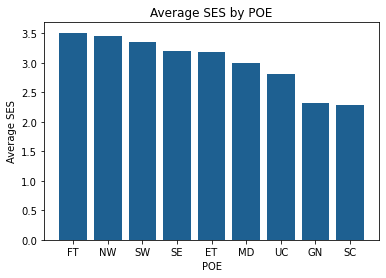

In [130]:
plt.bar(POE_group.POE,POE_group.econ_level,color='#1E6091')
plt.title('Average SES by POE')
plt.xlabel('POE')
plt.ylabel('Average SES')

plt.savefig('SES_PEO.png', transparent=True)

In [22]:
POE_group

,POE,econ_level
0,ET,3.187445
1,FT,3.512925
2,GN,2.317901
3,MD,3.000057
4,NW,3.460255
5,SC,2.293446
6,SE,3.194994
7,SW,3.360306
8,UC,2.805718


In [98]:
county_group=socio.groupby('County Name')['econ_level'].sum()/socio.groupby('County Name')['econ_level'].count()

In [99]:
county_group=county_group.to_frame().reset_index()
county_group

,County Name,econ_level
0,,NaN
1,Anderson,3.0
2,Bedford,3.0
3,Benton,4.0
4,Bledsoe,5.0
...,...,...
91,Wayne,4.0
92,Weakley,3.0
93,White,3.0
94,Williamson,1.0


In [33]:
counties = gpd.read_file('../data/tncounty.shp')

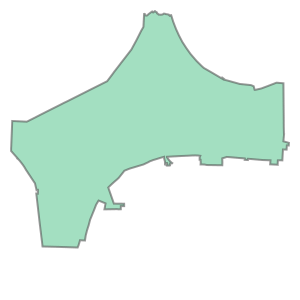

In [34]:
counties.loc[0, 'geometry']

In [45]:
counties['geo_name_lower']=counties['NAME'].str.lower()
county_group['teis_county_name_lower']= county_group['County Name'].str.lower()

counties_SES=pd.merge(counties,county_group, left_on=['geo_name_lower'], right_on = ['teis_county_name_lower'], how= 'outer')
counties_SES

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,name_lower,geo_name_lower,County Name,econ_level,ties_county_name_lower,teis_county_name_lower
0,76.0,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",chester,chester,Chester,3.0,chester,chester
1,77.0,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",wayne,wayne,Wayne,4.0,wayne,wayne
2,78.0,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",tipton,tipton,Tipton,3.0,tipton,tipton
3,79.0,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",hamilton,hamilton,Hamilton,3.0,hamilton,hamilton
4,80.0,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",stewart,stewart,Stewart,3.0,stewart,stewart
...,...,...,...,...,...,...,...,...,...,...,...,...
91,92.0,Franklin,47051,1.605093e+10,621176.096919,"POLYGON ((1873015.265 239618.144, 1872957.848 ...",franklin,franklin,Franklin,3.0,franklin,franklin
92,93.0,Bradley,47011,9.241234e+09,457372.233476,"POLYGON ((2274954.438 239788.911, 2275552.803 ...",bradley,bradley,Bradley,3.0,bradley,bradley
93,94.0,Marion,47115,1.428734e+10,529431.591556,"POLYGON ((2126056.390 236919.771, 2122873.509 ...",marion,marion,Marion,3.0,marion,marion
94,95.0,Polk,47139,1.233228e+10,479994.126988,"POLYGON ((2355580.184 332970.851, 2355673.384 ...",polk,polk,Polk,3.0,polk,polk


In [36]:
type(counties_SES)

geopandas.geodataframe.GeoDataFrame

In [50]:
counties_SES=counties_SES.iloc[:-1 , :]

fig, ax = plt.subplots(figsize = (20,20))
counties_SES.plot(ax = ax, column = 'econ_level', cmap = 'GnBu',edgecolor = 'black')

for index, row in counties_SES.iterrows():
    plt.annotate(text=row['NAME'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold')

plt.yticks(ticks=[])
plt.xticks(ticks=[])
    
plt.savefig('SES_PEO.png', transparent=True)   
plt.title('SES By County');

In [53]:
re_referrals = clean_data[clean_data.duplicated(subset='Child ID', keep='first')]
re_referrals

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year,geometry
25,360966,2017-01-12,2016-2017,Jan,Eastern,2016.0,2017-01-18,1.0,3.0,ET,...,,,,,,Referral less than 45 days,2017-01-17,DCS,2017,None
27,361021,2016-11-29,2016-2017,Nov,Eastern,2016.0,2017-02-17,1.0,2.0,ET,...,2016-11-29,Eligible,12/5/2016,12/21/2016,1/5/2017,618 - Part B eligible,2017-02-16,Family and Friends,2016,None
29,361038,2016-08-26,2016-2017,Aug,Middle,2016.0,2016-12-25,,1.0,GN,...,2016-09-02,Ineligible,4/30/2014,,,Unable to contact,,DCS,2016,None
31,361040,2016-10-28,2016-2017,Oct,Eastern,2016.0,2017-01-22,1.0,2.0,ET,...,2016-10-28,Eligible,4/2/2014,4/17/2014,11/2/2016,618 - Part B eligibility not determined,2017-01-21,Parent,2016,None
47,363098,2016-09-29,2016-2017,Sep,Middle,2016.0,2017-04-07,,1.0,SC,...,2016-10-04,Eligible,8/12/2014,8/22/2014,10/4/2016,,,DCS,2016,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113471,529200,2022-06-21,,,,,,,,FT,...,,,,,,,,Parent,2022,None
113561,529303,2022-06-17,,,,,,,,SE,...,,,,,,,,Parent,2022,None
113605,529365,2022-06-28,,,,,,,,UC,...,,,,,,,,Parent,2022,None
113657,529416,2022-05-26,2021-2022,May,Middle,2021.0,2022-10-09,,4.0,GN,...,,,,,,Parent decline,,Dept. of Health,2022,None


In [78]:
re_referrals_by_source = re_referrals.groupby(['Referral Source Type Name'])['Child ID'].count()/(clean_data['Child ID'].count())*100

In [79]:
re_referrals_by_source.to_frame().reset_index()

,Referral Source Type Name,Child ID
0,Child Care provider,0.045012
1,Community/Child Find Activity,0.037222
2,DCS,3.645130
3,DHS,0.001731
4,Dept. of Health,0.581697
5,EIRA,0.052803
6,Early Head Start/Head Start,0.144559
7,Family and Friends,0.084831
8,Foster Parent,0.099546
9,Hospital,1.011911


In [80]:
ref_by_source =(clean_data.groupby(['Referral Source Type Name'])['Child ID'].count())/(clean_data['Child ID'].count())*100

In [82]:
ref_by_source.to_frame().reset_index()

,Referral Source Type Name,Child ID
0,CAPTA,0.001731
1,Child Care provider,0.375680
2,Community/Child Find Activity,0.334130
3,DCS,22.264638
4,DHS,0.011253
5,DMRS,0.000866
6,Dept. of Health,3.181157
7,EIRA,0.303833
8,Early Head Start/Head Start,0.887262
9,Family and Friends,0.446660


In [89]:
ref_by_source.rename(columns = {'Child ID':'Percent of Referrals', inplace = True)

SyntaxError: invalid syntax (3753376072.py, line 1)